# Project: Train a Quadcopter How to Fly
**Student:**  Whitney King

**Date:**     1/20/2019 - 1/30/2019

**Program:**  Udacity Machine Learning Engineer Nanodegree (Term 2)


Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2


import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 1000.                                  # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 1.])         # initial velocities
init_angle_velocities = np.array([0.2, 0.2, 1.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

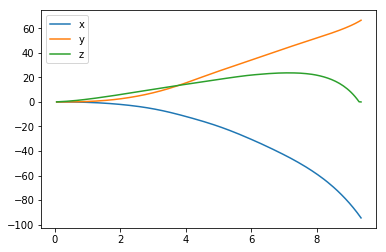

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

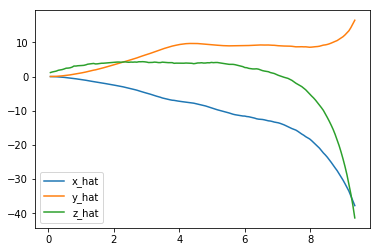

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

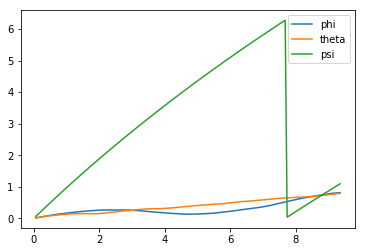

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

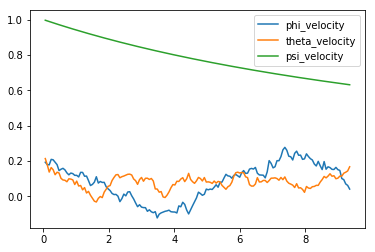

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

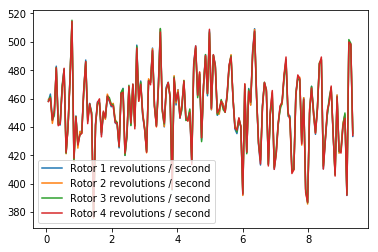

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-94.47904181  66.56709543   0.           0.81079681   0.79195332
   1.09412066]
[-37.7819019   16.47912462 -41.38893695]
[0.04171382 0.16781408 0.63158996]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.]) # move quadcopter to 10 on z axis
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -3.347 (best =   0.144), noise_scale = 3.2

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
#---------------------------------------------------------
# DDPG Actor / Critic / Agent
# Task:  Take Off
#---------------------------------------------------------

import sys
import csv
import pandas as pd
import numpy as np
from agents.policy_search import PolicySearch_Agent
from agents.agent import DDPG
from tasks.takeoff import TakeOff

Using TensorFlow backend.


My custom takeoff task is located in ```tasks/takeoff.py```

In [15]:
num_episodes = 500
target_pos = np.array([0., 0., 100.]) # take off stright in the air on z-axis

# Custom take off task located in the tasks folder
# takeoff.py
task = TakeOff(target_pos=target_pos)
agent = DDPG(task)

# uses buffer size to set limits for best and worst scores
worst = 9999999  # set worst score high so worse scores always go lower
best = -9999999  # set best score low so better scores always go higher
log = 'reward.log'

labels = ['episode', 'reward']
results = {x: [] for x in labels} # reset episode and rewards log

with open(log, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        score = 0  # reset score for each new episode
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            curr = task.current_state()
            state = next_state
            score += reward
            best = max(best, score) # Keep if new score is best
            worst = min(worst, score) # Keep is new score is worst
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v)
            if done:
                print("\rEpisode: {:4d} score: {:.1f} (best: {:.1f}), worst: {:.1f}) pose: {:.3f} velocity: {:.3f}".format(
                    i_episode, 
                    score, 
                    best, 
                    worst, 
                    curr[0], 
                    curr[1]), end="")
                break
        results[labels[0]].append(i_episode)  # log episode score
        results[labels[1]].append(score)
        #sys.stdout.flush()
        
        writer.writerow(to_write)


Episode:  500 score: 87.0 (best: 252.0), worst: 3.0) pose: -6.965 velocity: 0.000

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

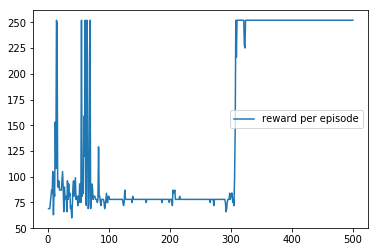

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['reward'], label='reward per episode')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: **Describe the task that you specified in `task.py`.  How did you design the reward function?**

**Answer**:  To jump into this project, I wanted to identify a relatively simple task to conceptualize and structure, thus I started by training the agent to **take off**. Designing a reward function is one of the more mathematically challenging tasks so far in this program, so I didn't want to veer too far off the beaten path in the materials until I built confidence in my practical understanding of the functionality.

When considering the math that could be used for designing the reward function, I wanted to used this as an opportunity to do something completely different than what was used for the example. Using the reward function in the linear state provided (the difference in the simulated and target positions) provides a lot of variance in the reward output in a way this isn't very conducive to training a learner. 

I initially had planned to keep the foundations of the equation provided, and built on it with the ```tanh``` function. This kept the output rewards between [-1, 1], but I was not happy with the overall performance or learning still. This seems to be partially due to not well formulated neural net arcitecture in the actor and critic, but I also found it partially due to this equation not having enough nuiance about how it applied rewards to the quadcopters take off.

When thinking about a take off action, you shouldn't just be considering the distance from the current position to the target postion, but also things like the euler angles of the motors. A good, clean take off should be straight up without a lot of wobbling around in the air for steadiness. With this in mind, I threw out the initial equation all together, and opted to implement a penalty and reward tier system. I ended up penalizing for the sum of the axis for distance from target, as well as sum of the euler angles squared. Then, based on how close to the target the quadcopter is, had 5 tiers of reward values, from 10 to 1000. Finally, I deducated the penalty from the total reward, and *then* wrapped it in the ```tanh``` function, and multiplied it by .005 to scale it.

**Penalty:**

```abs((self.sim.pose[3:6]).sum() ** 2) + abs(self.sim.pose[:3] - self.target_pos).sum()```

**Reward:**

```dist = abs(np.array(current_pos) - np.array(self.target_pos)).sum()```

    if dist == 0: reward += 1000     # very large reward for reaching target
    elif dist <= 10: reward += 500   
    elif dist <= 50: reward += 250   # increase reward as dist gap closes
    elif dist <= 100: reward += 100
    else: reward += 10               # small reward for episode completion

**Return:**

```np.tanh(reward - penalty *.005)```

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- **What learning algorithm(s) did you try? What worked best for you?**

    **Answer**:  In keeping with the same logic that lead me to pick the take off task, I ended up choosing and sticking with a **Deep Deterministic Policy Gradients (DDPG)** algorithm. The example provided was a good template on which to build a learning model and develop my understanding of how these systems work.
    
    One thing that did immediately come into focus is that while this RL algorithm functions well with continuous action (such as manuvers performed by a quadcopter), the original reward function and model did not end up learning. So while the DDPG example provided was a good jump off point, accomplishing this project required a lot of investigation and trial and error around hyperparameter values, as well as the neural net architecture within the actor and critic. Both streamlining the neural net arcitecture and setting the learning rate of the Adam optimizers in both the actor and critic seemed to make a noticable impact on the algorithm's performance and learning capacity.
    
- **What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?**
    
    **Answer**:  Hyperparameters definitely made some interesting differences in the scores, so I tried my best to tune them as intuiatively as I could based on seeing evidence of learning in the plot showing reward score per episode. The hyperparameter values I used which returned a satisfactory performance were:
    -  **Agent:**
        -  ```self.exploration_mu = 0        # untouched```
        -  ```self.exploration_theta = 0.25  # increase noise```
        -  ```self.exploration_sigma = 0.45  # increase noise```
        -  ```self.gamma = 0.99              # untouched```
        -  ```self.tau = 0.001               # add decial place```
        -  ```self.buffer_size = 9999999     # all 9s and large replay memory```
        -  ```self.batch_size = 64           # untouched```
    -  **Actor:**
        -  Learning Rate:  ```.001```
    -  **Critic:**
        -  Learning Rate:  ```.01``` 

- **What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.**

    **Answer**: For both the actor and critic, I used very similar but slightly different structures.
    
    **Actor:**
    When testing out different architectures for this neural net, I tried a few different things such as BatchNormalization and Flatten when testing out different layers, but found the more complex it got, performance speed suffered greatly, and it didn't come with any remarkable strides in learning. Because of this, I stuck with three very simple Dense layers using ```relu``` activation, and each layer gradually decreasing in number of units. After grappling with the performance for a while, I added an ```l2``` kernel_regularizer set to 1e-6, which helped learning/gradient be a lot more obvious and consistent,. Finally, I assigned a learning rate of .001 to the Adam optimizer. For the final output layer and actions, I left the functions dealing with the ```sigmoid``` activation and ```lambda``` as they were, since they were working as expected without intervention.
    
    ```
    # Add hidden layers
    net = layers.Dense(units=128,
                       kernel_regularizer=layers.regularizers.l2(1e-6),
                       activation='relu')(states)
    net = layers.Dense(units=64,
                       kernel_regularizer=layers.regularizers.l2(1e-6),
                       activation='relu')(net)
    net = layers.Dense(units=32,
                       kernel_regularizer=layers.regularizers.l2(1e-6),
                       activation='relu')(net)
    ```
    

  **Critic:**
  When creating the neural net arcitechture for the critic, I wanted to keep it similar to the actor, but with somewhat more streamlined layers. Used two similar Dense layers for each the state and action pathways, and then assigned a learning rate of .01 to the Adam optimizer. Combining the state and action pathways, and the final Q value layer I left untouched.
  
      
      # Add hidden layer(s) for state pathway)
      net_states = layers.Dense(units=64, 
                                kernel_regularizer=layers.regularizers.l2(1e-6),
                                activation='relu')(states)
      net_states = layers.Dense(units=32, 
                                kernel_regularizer=layers.regularizers.l2(1e-6),
                                activation='relu')(net_states)

      # Add hidden layer(s) for action pathway
      net_actions = layers.Dense(units=64, 
                                 kernel_regularizer=layers.regularizers.l2(1e-6),
                                 activation='relu')(actions)
      net_actions = layers.Dense(units=32,
                                 kernel_regularizer=layers.regularizers.l2(1e-6),
                                 activation='relu')(net_actions)
    

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- **Was it an easy task to learn or hard?**
    
    **Answer**: Personally, I found this task to be **challenging not only for the agent but also for myself**. Different computer environments affected the performance of the agent, as well as the number of times it ran sequentially without a full refresh. I didn't attempt moving this particular project over to GPU processing or an AWS instance, as even when performing it's worst on my machines CPU, it wasn't taking more than about 15 minutes to run through 500 episodes. There were a lot of peaks and valleys, with some unpredictable score drops, that would eventually build back up and plateau again before I added the kernel_regularizer to the Dense layers in the neural net architecture. In general with the agents final settings,  the output has been fairly consistent with evidence of a trend towards learning within about 250 episodes, and much fewer crashes and struggles to relearn than I'd started with.

- **Was there a gradual learning curve, or an aha moment?**

    **Answer**: My final algorithm and agent **definitely displayed learning via 'a-ha' moments**. There will be pretty significant leaps from scores around 70 - 100 that very quickly tick up to the max it learns of 252. These will be sustained for a good while, but sometimes would drop back down, before searching for another 'a-ha' that bring the scores back up.
    
- **How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)**

    **Answer**: As far as this particular reward function works, the final performance of the agent was good, with the **last 200 or so episodes all coming in with it's best reward score of 252**. The reward function I used caps out at 252 when I integrated ```tanh``` no matter how else I adjusted the other hyperparameter values or neural net architecture, so it would be interesting to dig into this more into the simulation environment to understand how it works, and things to do to improve learning from here. I tried the reward function without wrapping it with ```tanh``` as well as without adding the kernel_regularizer, but found the reward outcomes to be a lot more chaotic and much less indicative of learning, so ultimately landed on my final structure as the most promising.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- **What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)**
    
    **Answer:** By far, the part I struggled with the most was getting myself out of my head as far as being afraid of the equations and math we'd covered in the lessons leading up to this, and the prospect of having to understand and apply that to a learning agent. It took me a long time grappling with this project, reading it over and over, and playing with all kinds of parameter values before something clicked and I understood how this was functioning as a whole. That said, once I was able to make sense of the difference pieces and effects, then how to improve the performance so that it was evident the agent learned, it was a really exciting and rewarding process.

- **Did you find anything interesting in how the quadcopter or your agent behaved?**

    **Answer:** Yes! It was very strange to me at first when the example wasn't performing well, and the quadcopter appeared to be flipping all over the place and frequently crashing. However, really grasping how the x, y, z axis, and different velocities impacted accomplishing different tasks, it became clear how to direct this behavior toward the intended results using different parameter values. From here, it will be an interesting task for me to learn more about how these simulated environments work, and how to generate 3D visualizations alongside the simuations while they run.
    
    At the end, it was a pretty intuiative process once it was clear how the different hyperparameters influence speed, position, steadiness, and overall control.